In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm

# Load the data
# Go one folder back
os.chdir("..")
path = "C:\\Users\\sapta\\OneDrive\\Documents\\GitHub\\M3Challenge2024\\data\\bh_housing_units.csv"
bh_housing = pd.read_csv(path)

# Convert the Year column to datetime
bh_housing['Year'] = pd.to_datetime(bh_housing['Year'], format='%Y')

# Convert all other columns to numeric.
for col in bh_housing.columns[1:]:
    if bh_housing[col].dtype == 'object':
        # Remove commas and convert to numeric
        bh_housing[col] = pd.to_numeric(bh_housing[col].str.replace(',', ''))

print(bh_housing.head())

        Year  Total housing units  Bungalow  Flat / Maisonette  \
0 1993-01-01               114660      5680              29190   
1 1994-01-01               114610      6180              32430   
2 1995-01-01               115620      6580              35610   
3 1996-01-01               116760      6930              39200   
4 1997-01-01               117320      7390              42310   

   Terraced House  Semi-Detached House  Detached House  Annexe  \
0           15490                11020            4260       0   
1           16800                11900            4580       0   
2           18090                12600            4920       0   
3           19650                13310            5360       0   
4           21030                14080            5700      10   

   Caravan/ Houseboat/ Mobile Home  Unknown  Unnamed: 10  Unnamed: 11  \
0                                0    49010          NaN          NaN   
1                                0    42720          NaN    

In [2]:
path = "C:\\Users\\sapta\\OneDrive\\Documents\\GitHub\\M3Challenge2024\\data\\manchester_housing_units.csv"
manchester_housing = pd.read_csv(path)

# Convert the Year column to datetime
manchester_housing['Year'] = pd.to_datetime(manchester_housing['Year'], format='%Y')

# Convert all other columns to numeric.
for col in manchester_housing.columns[1:]:
    if manchester_housing[col].dtype == 'object':
        # Remove commas and convert to numeric
        manchester_housing[col] = pd.to_numeric(manchester_housing[col].str.replace(',', ''))
print(manchester_housing.head())

        Year  Total housing units  Bungalow  Flat / Maisonette  \
0 1993-01-01               187070      1780              39620   
1 1994-01-01               187440      1840              40270   
2 1995-01-01               186560      1950              42600   
3 1996-01-01               188100      1990              44750   
4 1997-01-01               189190      2070              47210   

   Terraced House  Semi-Detached House  Detached House  Annexe  \
0           59010                39060            2710       0   
1           60770                40350            2860       0   
2           62650                41790            3070       0   
3           64670                43140            3290       0   
4           66660                44590            3490       0   

   Caravan/ Houseboat/ Mobile Home  Unknown  Unnamed: 10  Unnamed: 11  \
0                               80    44810          NaN          NaN   
1                               80    41280          NaN    

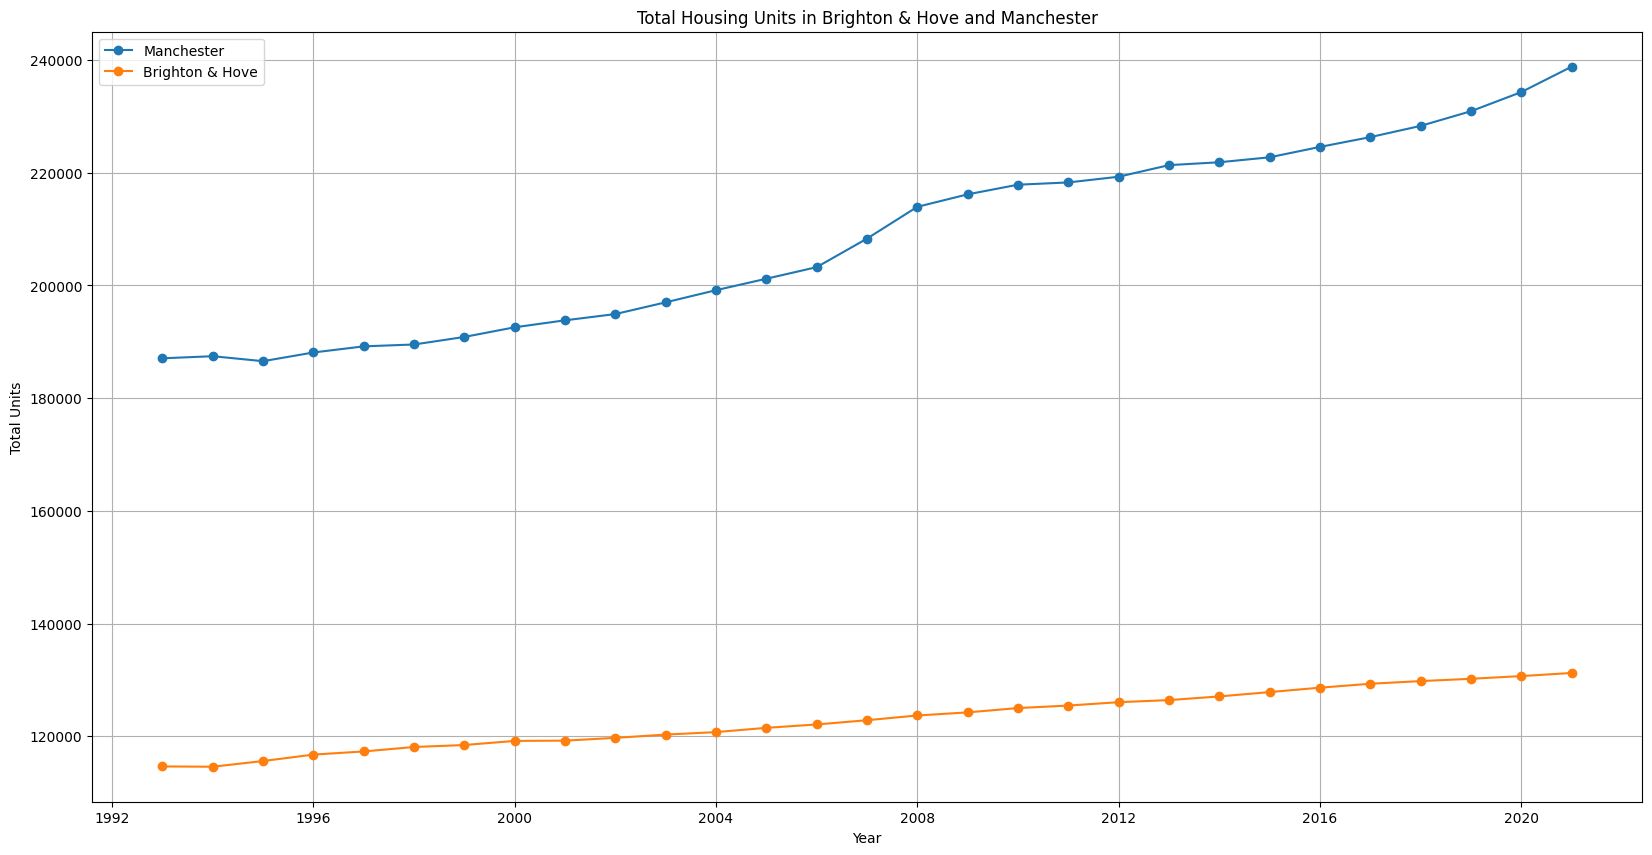

In [3]:
plt.figure(figsize=(20, 10))
plt.plot(manchester_housing['Year'], manchester_housing['Total housing units'], '-o', label='Manchester')
plt.plot(manchester_housing['Year'], bh_housing['Total housing units'], '-o', label='Brighton & Hove')
plt.xlabel('Year')
plt.ylabel('Total Units')
plt.grid()
plt.legend(loc='upper left')
plt.title('Total Housing Units in Brighton & Hove and Manchester')
plt.show()

Brighton & Hove m: 601.024630541863 b: -1083256.778325105
R^2: 0.9972526655059843
Manchester m: 1932.502463054153 b: -3670134.857142788
R^2: 0.9738385309720766


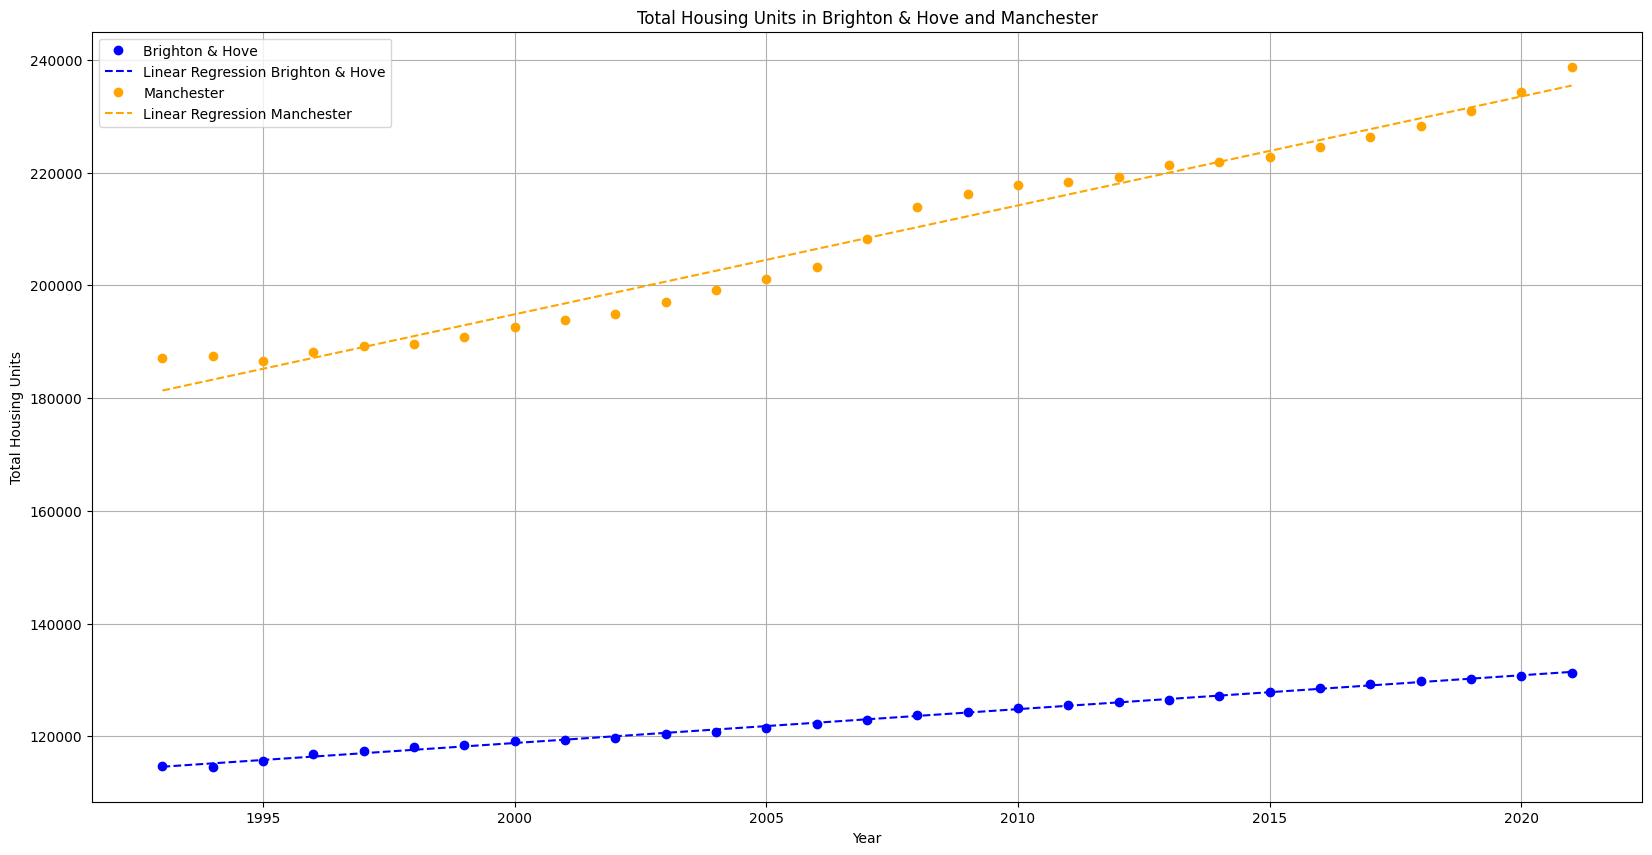

In [4]:
# Plot the data for the two cities
plt.figure(figsize=(20, 10))

# Make a linear regression using numpy.
m_bh, b_bh = np.polyfit(bh_housing['Year'].dt.year, bh_housing['Total housing units'], 1)
print('Brighton & Hove', 'm:', m_bh, 'b:', b_bh)

# Calculate the r^2 value
r_squared = np.corrcoef(bh_housing['Year'].dt.year, bh_housing['Total housing units'])[0, 1]**2
print(f"R^2: {r_squared}")

plt.plot(bh_housing['Year'].dt.year, bh_housing['Total housing units'], 'o', label='Brighton & Hove', color='blue')
plt.plot(bh_housing['Year'].dt.year, m_bh*bh_housing['Year'].dt.year + b_bh, '--', label='Linear Regression Brighton & Hove', color='blue')

# Make a linear regression using numpy.
m_manchester, b_manchester = np.polyfit(manchester_housing['Year'].dt.year, manchester_housing['Total housing units'], 1)
print('Manchester', 'm:', m_manchester, 'b:', b_manchester)

# Calculate the r^2 value
r_squared = np.corrcoef(manchester_housing['Year'].dt.year, manchester_housing['Total housing units'])[0, 1]**2
print(f"R^2: {r_squared}")

plt.plot(manchester_housing['Year'].dt.year, manchester_housing['Total housing units'], 'o', label='Manchester', color='orange')
plt.plot(bh_housing['Year'].dt.year, m_manchester*bh_housing['Year'].dt.year + b_manchester, '--', label='Linear Regression Manchester', color='orange')

plt.xlabel('Year')
plt.ylabel('Total Housing Units')
plt.grid()
plt.legend(loc='upper left')
plt.title('Total Housing Units in Brighton & Hove and Manchester')
plt.show()

Brighton & Hove
                             OLS Regression Results                            
Dep. Variable:     Total housing units   R-squared:                       0.997
Model:                             OLS   Adj. R-squared:                  0.997
Method:                  Least Squares   F-statistic:                     9801.
Date:                 Mon, 04 Mar 2024   Prob (F-statistic):           4.06e-36
Time:                         14:42:57   Log-Likelihood:                -202.84
No. Observations:                   29   AIC:                             409.7
Df Residuals:                       27   BIC:                             412.4
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.083e+06   1.

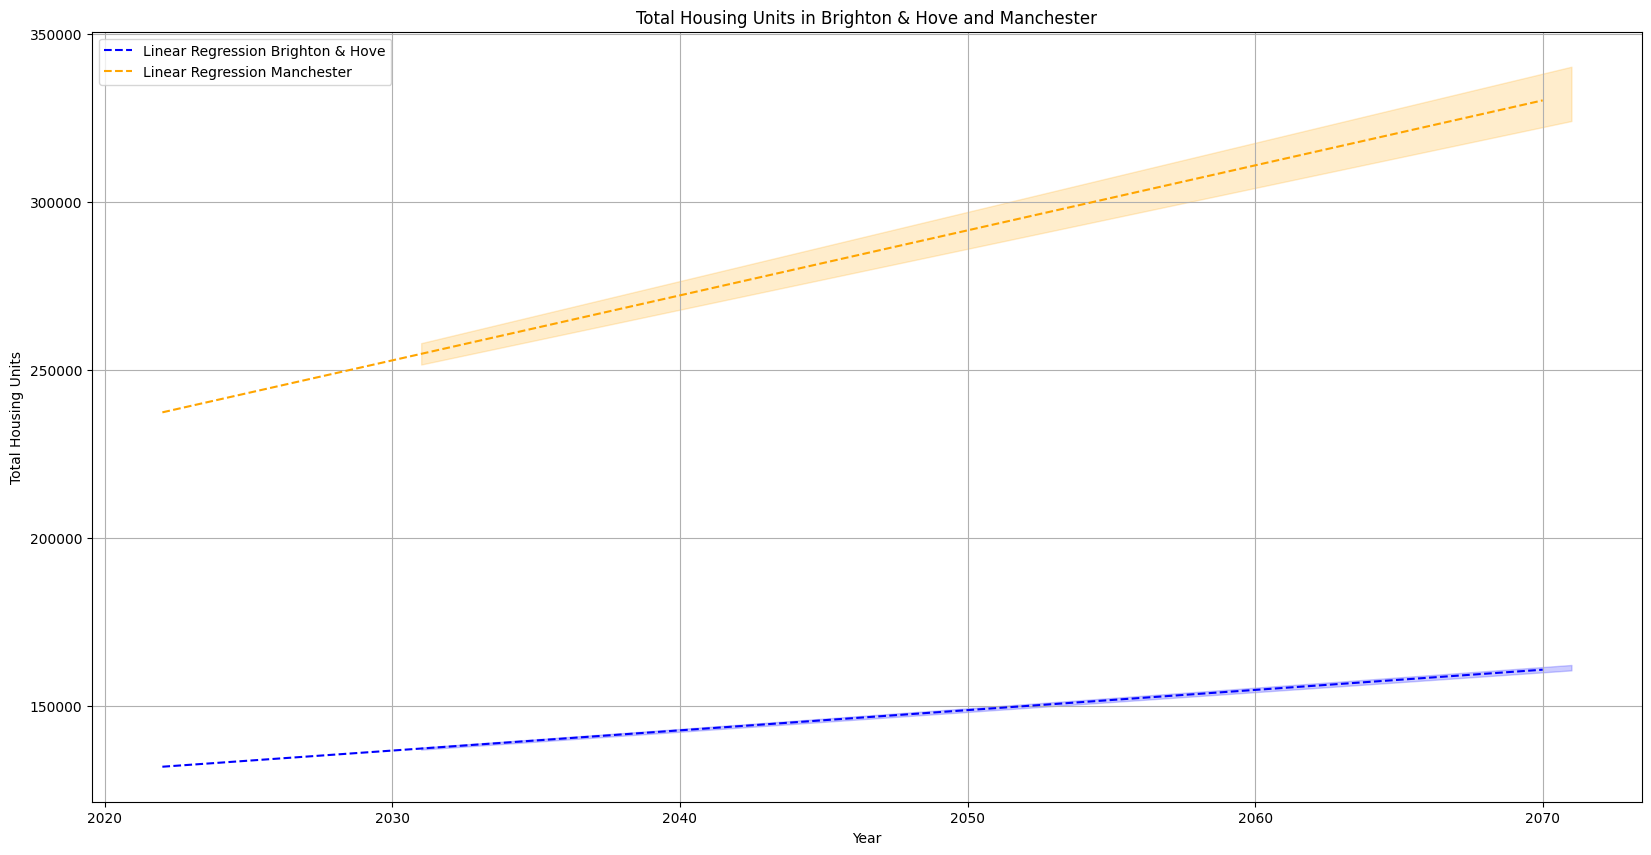

In [5]:
# Create statsmodels linear regression for Brighton & Hove
# Use statsmodels to calculate the confidence interval.
alpha = 0.05 # 95% confidence interval
bh_lr = sm.OLS(bh_housing['Total housing units'], sm.add_constant(bh_housing['Year'].dt.year)).fit()
print('Brighton & Hove')
print(bh_lr.summary())

# Create statsmodels linear regression for Manchester
# Use statsmodels to calculate the confidence interval.
alpha = 0.05 # 95% confidence interval
manchester_lr = sm.OLS(manchester_housing['Total housing units'], sm.add_constant(manchester_housing['Year'].dt.year)).fit()
print('\n\n\nManchester')
print(manchester_lr.summary())

# Extrapoloate the data for the next 10, 20, 50 years.
# Create confidence intervals for the next 10, 20, 50 years.
years = np.array([2031, 2041, 2071])
bh_conf_interval = bh_lr.get_prediction(sm.add_constant(years)).conf_int(alpha=alpha)
bh_housing_pred_low = bh_conf_interval[:, 0]
bh_housing_pred_average = bh_lr.predict(sm.add_constant(years))
bh_housing_pred_high = bh_conf_interval[:, 1]
print('Brighton & Hove')
for year, pred_low, pred_avg, pred_high in zip(years, bh_housing_pred_low, bh_housing_pred_average, bh_housing_pred_high):
    print(year, pred_low, pred_high)

# Make a table for Brighton & Hove
pred_bh = pd.DataFrame({'Year': years, 'Low': bh_housing_pred_low, 'Average': bh_housing_pred_average, 'High': bh_housing_pred_high})
print(pred_bh)

manchester_conf_interval = manchester_lr.get_prediction(sm.add_constant(years)).conf_int(alpha=alpha)
manchester_housing_pred_low = manchester_conf_interval[:, 0]
manchester_housing_pred_average = manchester_lr.predict(sm.add_constant(years))
manchester_housing_pred_high = manchester_conf_interval[:, 1]
print('\nManchester')
for year, pred_low, pred_avg, pred_high in zip(years, manchester_housing_pred_low, manchester_housing_pred_average, manchester_housing_pred_high):
    print(year, pred_low, pred_avg, pred_high)

# Make a table for Manchester
pred_manchester = pd.DataFrame({'Year': years, 'Low': manchester_housing_pred_low, 'Average': manchester_housing_pred_average, 'High': manchester_housing_pred_high})
print(pred_manchester)

# Plot the predicted data for the two cities.
time = np.arange(2022, 2071, 1)
plt.figure(figsize=(20, 10))
plt.plot(time, m_bh*time + b_bh, '--', label='Linear Regression Brighton & Hove', color='blue')
plt.fill_between(years, bh_housing_pred_low, bh_housing_pred_high, color='blue', alpha=0.2)
plt.plot(time, m_manchester*time + b_manchester, '--', label='Linear Regression Manchester', color='orange')
plt.fill_between(years, manchester_housing_pred_low, manchester_housing_pred_high, color='orange', alpha=0.2)
plt.xlabel('Year')
plt.ylabel('Total Housing Units')
plt.grid()
plt.legend(loc='upper left')
plt.title('Total Housing Units in Brighton & Hove and Manchester')
plt.show()

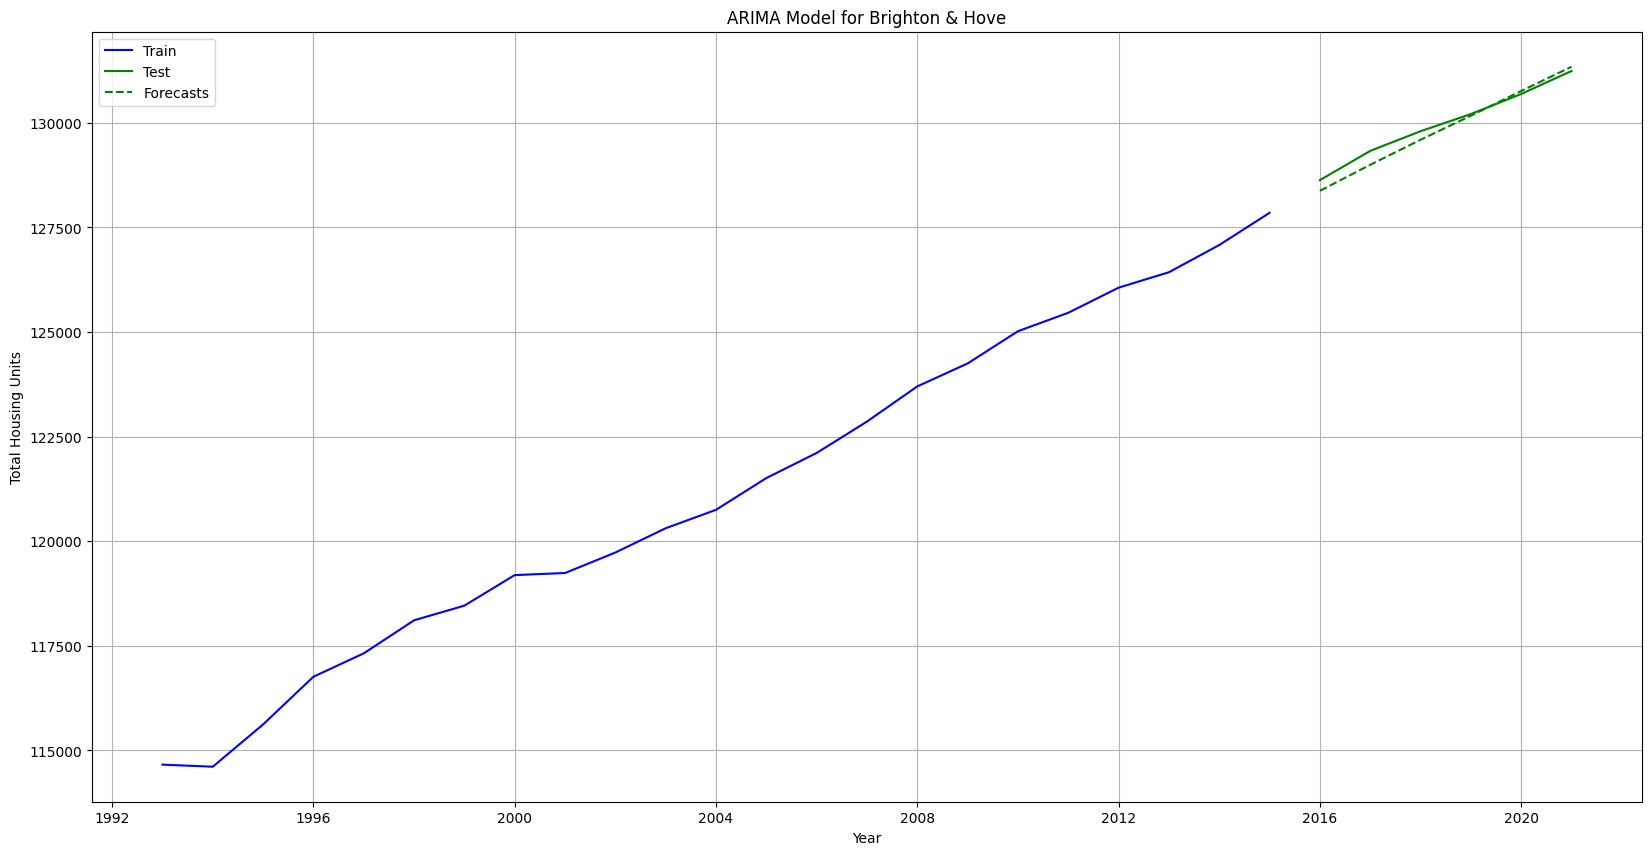

In [6]:
import pmdarima as pm
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(bh_housing['Year'], bh_housing['Total housing units'], test_size=0.2, shuffle=False)

# Fit your model
model = pm.auto_arima(train_y, seasonal=True, m=12)

forecasts = model.predict(test_y.shape[0])  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
plt.figure(figsize=(20, 10))
plt.plot(train_x, train_y, c='blue')
plt.plot(test_x, test_y, c='green')
plt.plot(test_x, forecasts, '--', c='green')
plt.legend(['Train', 'Test', 'Forecasts'], loc='upper left')
plt.grid()
plt.title('ARIMA Model for Brighton & Hove')
plt.xlabel('Year')
plt.ylabel('Total Housing Units')
plt.show()


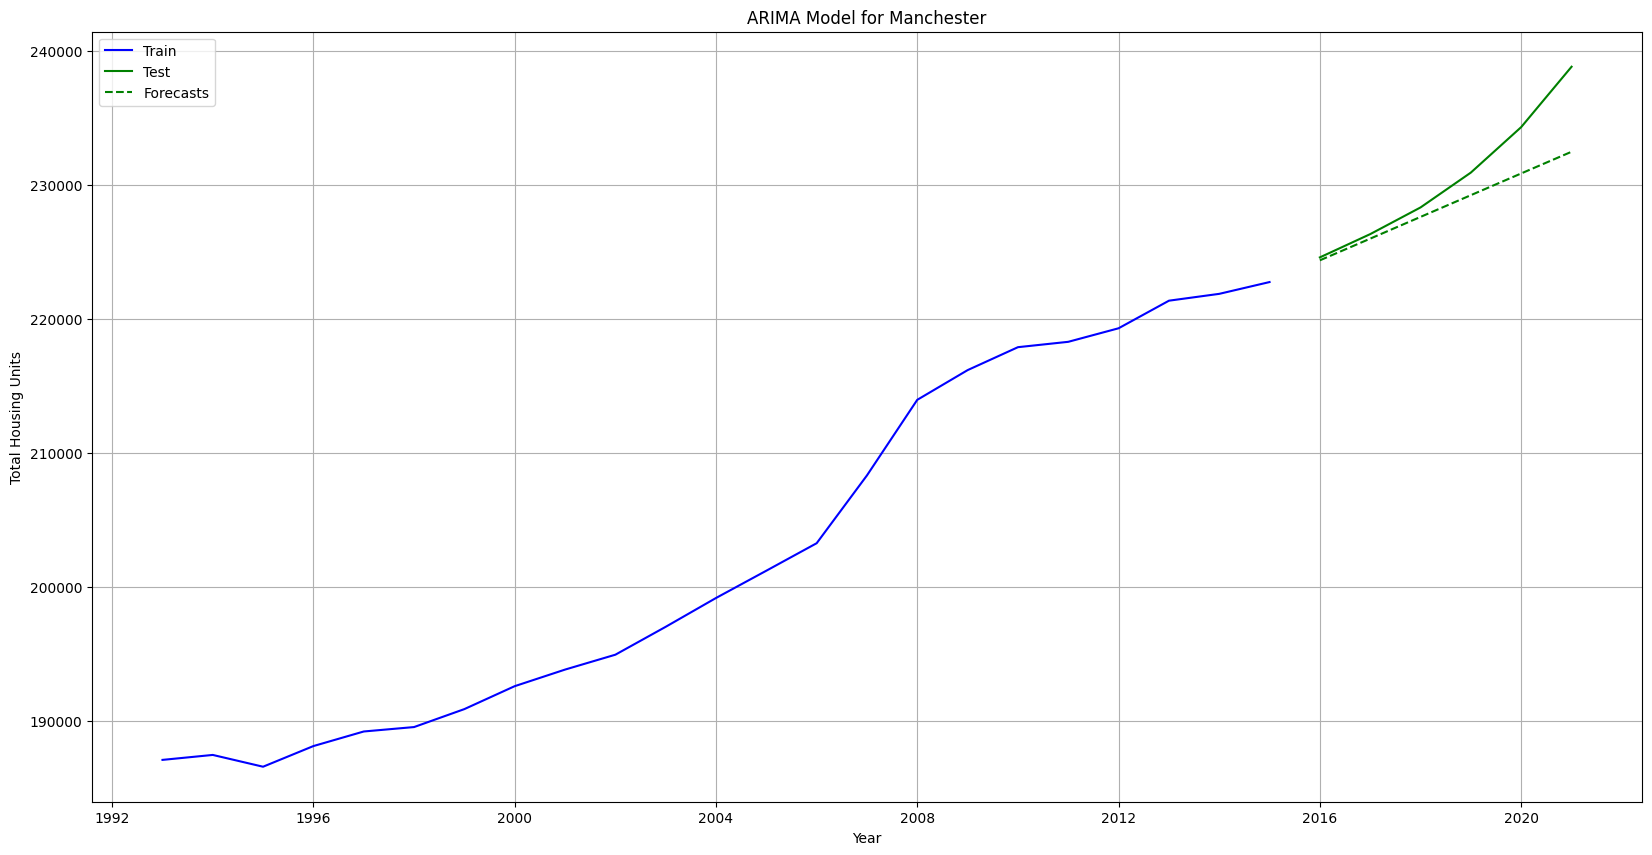

In [7]:
train_x, test_x, train_y, test_y = train_test_split(manchester_housing['Year'], manchester_housing['Total housing units'], test_size=0.2, shuffle=False)

# Fit your model
model = pm.auto_arima(train_y, seasonal=False)

# make your forecasts
forecasts = model.predict(test_y.shape[0])  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
plt.figure(figsize=(20, 10))
plt.plot(train_x, train_y, c='blue')
plt.plot(test_x, test_y, c='green')
plt.plot(test_x, forecasts, '--', c='green')
plt.legend(['Train', 'Test', 'Forecasts'], loc='upper left')
plt.grid()
plt.title('ARIMA Model for Manchester')
plt.xlabel('Year')
plt.ylabel('Total Housing Units')
plt.show()

In [8]:
# Perform senstivity analysis for the linear regression model
# For a small change in the model, how much does the output change?
# Check for Brighton & Hove.
m_bh, b_bh = np.polyfit(bh_housing['Year'].dt.year, bh_housing['Total housing units'], 1)
default_pred = m_bh*years + b_bh
years = np.array([2031, 2041, 2071])
m = np.linspace(0.95*m_bh, 1.05*m_bh, 5)
b = np.linspace(0.95*b_bh, 1.05*b_bh, 5)

# Create a dataframe to store the results
sensitivity_bh_2031 = pd.DataFrame()
sensitivity_bh_2041 = pd.DataFrame()
sensitivity_bh_2071 = pd.DataFrame()
# Make the index the m and the columsn the b.
sensitivity_bh_2031.index = m
sensitivity_bh_2041.index = m
sensitivity_bh_2071.index = m

# Loop through the m and b values and calculate the predictions.
for b_val in b:
    sensitivity_bh_2031[b_val] = m*2031 + b_val
    sensitivity_bh_2041[b_val] = m*2041 + b_val
    sensitivity_bh_2071[b_val] = m*2071 + b_val

    # Calculate the percent difference from the default prediction.
    sensitivity_bh_2031[b_val] = (sensitivity_bh_2031[b_val] - default_pred[0])/default_pred[0]*100
    sensitivity_bh_2041[b_val] = (sensitivity_bh_2041[b_val] - default_pred[1])/default_pred[1]*100
    sensitivity_bh_2071[b_val] = (sensitivity_bh_2071[b_val] - default_pred[2])/default_pred[2]*100

# Save the results to a csv file.
sensitivity_bh_2031.to_csv('sensitivity_bh_2031.csv')
sensitivity_bh_2041.to_csv('sensitivity_bh_2041.csv')
sensitivity_bh_2071.to_csv('sensitivity_bh_2071.csv')
print(sensitivity_bh_2031)

# Check for Manchester
m_manchester, b_manchester = np.polyfit(manchester_housing['Year'].dt.year, manchester_housing['Total housing units'], 1)
default_pred = m_manchester*years + b_manchester
years = np.array([2031, 2041, 2071])
m = np.linspace(0.95*m_manchester, 1.05*m_manchester, 5)
b = np.linspace(0.95*b_manchester, 1.05*b_manchester, 5)

# Create a dataframe to store the results
sensitivity_manchester_2031 = pd.DataFrame()
sensitivity_manchester_2041 = pd.DataFrame()
sensitivity_manchester_2071 = pd.DataFrame()

# Make the index the m and the columsn the b.
sensitivity_manchester_2031.index = m
sensitivity_manchester_2041.index = m
sensitivity_manchester_2071.index = m

# Loop through the m and b values and calculate the predictions.
for b_val in b:
    sensitivity_manchester_2031[b_val] = m*2031 + b_val
    sensitivity_manchester_2041[b_val] = m*2041 + b_val
    sensitivity_manchester_2071[b_val] = m*2071 + b_val

    # Calculate the percent difference from the default prediction.
    sensitivity_manchester_2031[b_val] = (sensitivity_manchester_2031[b_val] - default_pred[0])/default_pred[0]*100
    sensitivity_manchester_2041[b_val] = (sensitivity_manchester_2041[b_val] - default_pred[1])/default_pred[1]*100
    sensitivity_manchester_2071[b_val] = (sensitivity_manchester_2071[b_val] - default_pred[2])/default_pred[2]*100

# Save the results to a csv file.
sensitivity_manchester_2031.to_csv('sensitivity_manchester_2031.csv')
sensitivity_manchester_2041.to_csv('sensitivity_manchester_2041.csv')
sensitivity_manchester_2071.to_csv('sensitivity_manchester_2071.csv')

print(sensitivity_manchester_2031)

            -1.029094e+06  -1.056175e+06  -1.083257e+06  -1.110338e+06  \
570.973399      -5.000000     -24.706435     -44.412870     -64.119304   
585.999015      17.206435      -2.500000     -22.206435     -41.912870   
601.024631      39.412870      19.706435       0.000000     -19.706435   
616.050246      61.619304      41.912870      22.206435       2.500000   
631.075862      83.825739      64.119304      44.412870      24.706435   

            -1.137420e+06  
570.973399     -83.825739  
585.999015     -61.619304  
601.024631     -39.412870  
616.050246     -17.206435  
631.075862       5.000000  
             -3.486628e+06  -3.578381e+06  -3.670135e+06  -3.761888e+06  \
1835.877340      -5.000000     -41.013117     -77.026234    -113.039351   
1884.189901      33.513117      -2.500000     -38.513117     -74.526234   
1932.502463      72.026234      36.013117       0.000000     -36.013117   
1980.815025     110.539351      74.526234      38.513117       2.500000   
2029.127586 